# <center> Projet Numérique <center>

<strong>FORSON</strong> Kaya
<br><strong>NAHIL</strong> Anass

Pour le: 10 Décembre 2023

L3 GMP - Groupe 2

## PARTIE A

### Exercice A.1: POINT FIXE
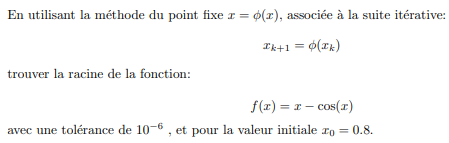



1. Etudier la fonction et tracer la fonction sur l'intervalle [-1/2 ; 3]

- Dérivé:
    
    f(x) = x - cos(x)
    <br>f'(x) = 1 + sin(x)
Donc la signe de f'(x) est positive.

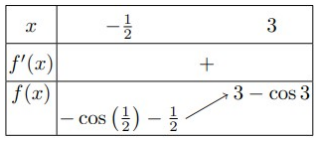


In [6]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
import pandas as pd

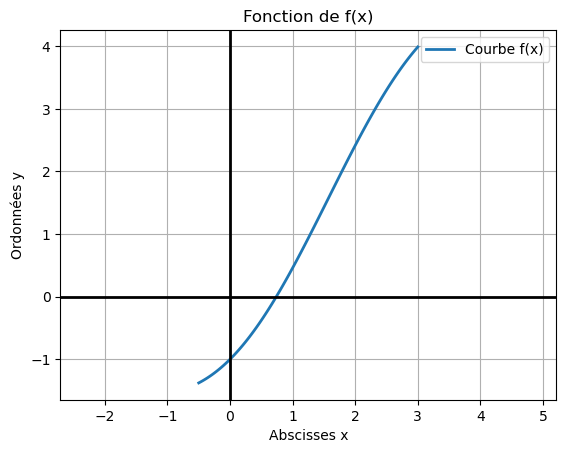

In [7]:
#On définit notre fonction f(x)
def f(x):
    y=x-np.cos(x)
    return y

#Définir l'intervalle [-1/2;3]

a = -1/2
b = 3

x = np.linspace(a, b, 100)
y = f(x)

#Graphe
plt.plot(x,y, linewidth=2, label="Courbe f(x)")
plt.legend()
plt.title ("Fonction de f(x)")
plt.xlabel("Abscisses x")
plt.ylabel("Ordonnées y")

plt.axhline(0,color='black', linewidth=2)
plt.axvline(0,color='black', linewidth=2)

plt.axis("equal")
plt.grid()
plt.show()


2. Ecrire un script python permettant l'implémentation du schéma numérique de la méthode de point fixe

Le but de <u>la méthode de point fixe</u>, est de trouvé la racine de la fonction.

f(x) = x-cos(x)
<br>f(x) = 0 (c'est la racine de la fonction)

Ceci revient à dire que:

x - cos(x) = 0
<br>x = cos(x)

Donc g(x) = cos(x) 
<br>Ceci est <u>la méthode de point fixe</u>. (Dans l'énoncé g(x) = Ф(x))

Déterminons maintenant celà avec l'implémentation du schéma numérique:


In [8]:
def point_fixe(g, x0, tol, Nmax):

    # x0 : Valeur Initiale
    # tol : Tolérance (critère d'arrêt)
    # Nmax : Le nombre maximal d'itérations autorisé

    x = x0  # Initialisation de la variable x avec la valeur initiale
    N = 0  # Initialisation du compteur d'itérations

    while abs((g(x) - x) / g(x)) > tol and N < Nmax:
        x0 = x  # Mettre à jour la valeur précédente
        x = g(x)  # Calculer la prochaine approximation
        N += 1  # Incrémentation du compteur d'itérations

        if N >= Nmax:
            break

    return x

3. Afficher, sur le même graphe, la fonction f et la solution approché &epsilon;<sub>n</sub> obtenue pour la racine de f avec la tolérance de 10<sup>-6</sup> après n iterations.

Avec ce que nous avons vu précédament, chercher la racine de f(x) sur l'intervalle donné revient à cherche le point fixe de g(x).
<br>Nous allons donc définir la fonction de g(x) et calculer son point fixe sur l'intervalle donné. 

La solution est 0.7390855741535659


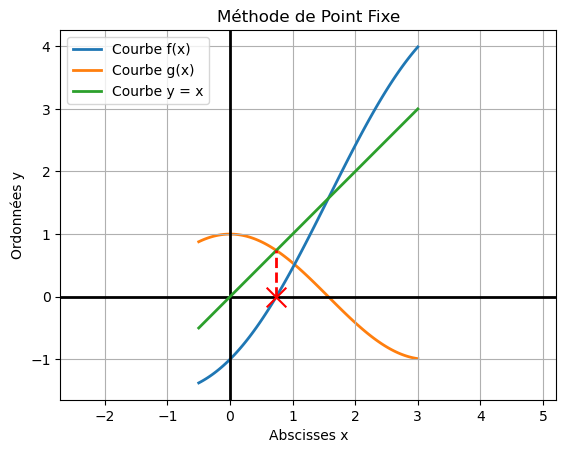

In [9]:
# Définition de la fonction g(x)
def g(x):
    y = np.cos(x)
    return y

# Choisissons Nmax = 100 arbitrairement
x_approx = point_fixe(lambda x: np.cos(x), 0.8, 1E-6, 100)

print("La solution est", x_approx)

# Tracé du graphe de la fonction g(x) avec y=x pour déterminer son point fixe, et donc, sa racine :

x = np.linspace(a, b, 100)  # Création d'une séquence de valeurs pour x
y = f(x)  # Calcul des valeurs de la fonction f(x)
y2 = g(x)  # Calcul des valeurs de la fonction g(x)
y3 = x  # Fonction y = x (une droite)

#Graphe
plt.plot(x,y, linewidth=2, label="Courbe f(x)", zorder=2 )
plt.plot(x,y2, linewidth=2, label="Courbe g(x)", zorder=1 )
plt.plot(x,y3, linewidth=2, label="Courbe y = x", zorder=3 )

plt.scatter(x_approx, 0, s=200, c = 'red', marker = 'x', zorder=4)
#plt.scatter(x_approx, 0.75, s=200, c = 'red', marker = 'x')

#Droite premettant de visualiser la racine de f(x)
plt.plot([x_approx, x_approx], [0, 0.75], 'r--', linewidth=2, zorder=5)

plt.legend()
plt.title ("Méthode de Point Fixe")
plt.xlabel("Abscisses x")
plt.ylabel("Ordonnées y")

plt.axhline(0,color='black', linewidth=2)
plt.axvline(0,color='black', linewidth=2)

plt.axis("equal")
plt.grid()
plt.show()

4. Afficher le graphe représantant la valeur de l'approximation &epsilon;<sub>k</sub> en fonction de l'itérations k

Nous allons définir une nouvelle fonction qui va collectionner successivement les valeurs des approximations et le nombre d'iterations et nous donnera en forme de listes.

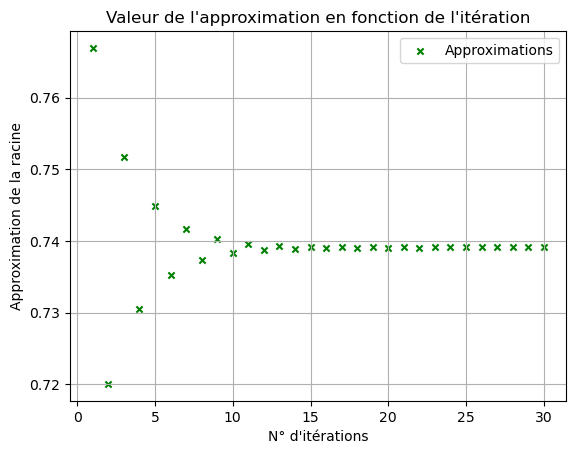

In [10]:
#Définir la nouvelle fonction
def point_fixe2(g, x0, e, Nmax):
    x = g(x0)  # Calculer la première approximation
    N = 0
    # Initialiser des listes avec les valeurs initiales
    list_x = []
    list_N = []
    
    # Nous allons exécuter une boucle tant que la différence absolue entre xn et xo est supérieure à la tolérance
    while (abs((x - x0) / x)) > e:
        x0 = x  # Mettre à jour la valeur précédente
        x = g(x0)  # Calculer la prochaine approximation
        N += 1
        if N >= Nmax:
            break
        list_x.append(x)  # Ajouter la nouvelle approximation à la liste
        list_N.append(N)  # Ajouter le nombre d'itérations à la liste
    
    return (list_x, list_N)

# Exemple d'utilisation de la fonction point_fixe2:
(l1, l2) = point_fixe2(lambda x: np.cos(x), 0.8, 1E-6, 100)  # Exemple d'utilisation de la fonction



# Exemple d'utilisation de la fonction point_fixe2:
(l1, l2) = point_fixe2(lambda x: np.cos(x), 0.8, 1E-6, 100)  # Exemple d'utilisation de la fonction

# Graphe à partir des listes
x = l2
y = l1

plt.scatter(x, y, s=20, c='green', marker='x', label="Approximations")  # Ajout d'une étiquette pour la légende

plt.legend()
plt.title("Valeur de l'approximation en fonction de l'itération")
plt.xlabel("N° d'itérations")
plt.ylabel("Approximation de la racine")

plt.grid()
plt.show()

Avec le graphe obtenu, nous observons que les valeurs de la racine converge cers une unique valeur. 

5. Tracer l'évolution de l'erreur e<sub>k</sub> = |&epsilon;<sub>k</sub> - &epsilon;<sub>n</sub>| en fonction de l'itération k.

Ce que nous allons faire est de modifier la fonction "point-fixe" pour collecter successivement l'erreur entre les approximations successives et le nombres d'itérations. Ceci nous permettra de suivre comment l'erreur évolue à chaque itération de la méthode du point fixe.

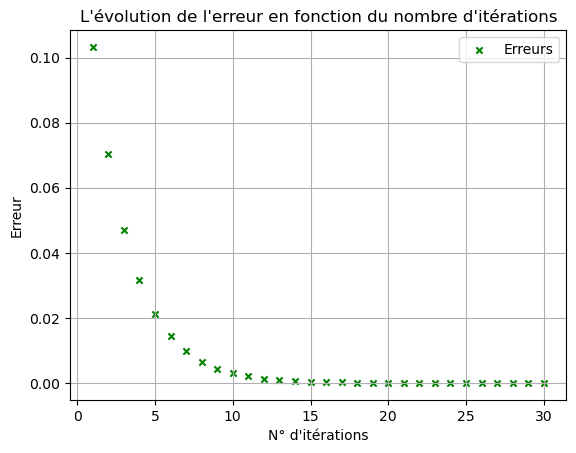

In [11]:
def point_fixe3(g, x0, tol, Nmax):
    x = g(x0)  # Calcul du premier point
    err = abs(x - x0)  # Calcul de l'erreur initiale
    N = 0  # Initialisation du compteur d'itérations
    list_ek = []  # Liste pour stocker les erreurs successives
    list_N = []  # Liste pour stocker le nombre d'itérations successives

    while abs((x - x0) / x) > tol:
        ek = abs(x - x0) # Calcul de l'erreur
        x0 = x  # Mise à jour de la valeur précédente
        x = g(x0)  # Calcul du prochain point
        N += 1  # Incrémentation du compteur d'itérations

        if N >= Nmax:
            break
        list_ek.append(ek)  # Ajout de l'erreur à la liste
        list_N.append(N)  # Ajout du nombre d'itérations à la liste

    return (list_ek, list_N)  # Retourne les listes d'erreurs et de nombres d'itérations

# Exemple d'utilisation de la fonction point_fixe3 :
(l3, l4) = point_fixe3(lambda x: np.cos(x), 0.8, 1E-6, 100)

#Graphique
x = l4
y = l3

plt.scatter(x, y, s=20, c='green', marker='x', label="Erreurs")  # Ajout d'une étiquette pour la légende

plt.legend()
plt.title("L'évolution de l'erreur en fonction du nombre d'itérations")
plt.xlabel("N° d'itérations")
plt.ylabel("Erreur")

plt.grid()
plt.show()


A partir de ce graphe, nous observons que l'erreur décroit exponentiellement

6. Tracer l'erreur log |&epsilon;<sub>k + 1</sub> - &epsilon;<sub>n</sub>| en fonction de log |&epsilon;<sub>k</sub> - &epsilon;<sub>n</sub>|<sup>q</sup> pour différentes q (q = 1, 2, 3) et déterminer l'order maximale de la méthode numérique en ajustant les point par une droite (fonction polyfit de la libraire numpy en python.) Quel est le facteur (de vitesse) de convergence?  

* Explication:
<br>En prenant le logarithme de l'erreur, nous pouvons mieux comprendre comment l'erreur diminue au fur et à mesure des itérations et obtenir une analyse plus fine de la convergence de la méthode du point fixe. Puis lorsqu'on prend le logarithme de l'erreur, nous obtenons aussi des informations sur la vitesse de convergence de la méthode.


Nous allons modifier pour une dernière fois la fonction "point_fixe" pour calculer les valeurs de log |&epsilon;<sub>k + 1</sub>| et log |&epsilon;<sub>k</sub>|


D'après le cours:
<br><center>|&epsilon;<sub>k + 1</sub>| = g'(r)*e<sub>n</sub></center>
avec g'(x) = -sin(x)

C:\Users\Kaya\AppData\Local\Temp\ipykernel_24496\2598486692.py:39: RankWarning: Polyfit may be poorly conditioned
  fit_slope = point_fixe4(lambda x: np.cos(x), 0.8, 1E-6, 100, 0.7390855741535659, 1)
C:\Users\Kaya\AppData\Local\Temp\ipykernel_24496\2598486692.py:39: RankWarning: Polyfit may be poorly conditioned
  fit_slope = point_fixe4(lambda x: np.cos(x), 0.8, 1E-6, 100, 0.7390855741535659, 1)


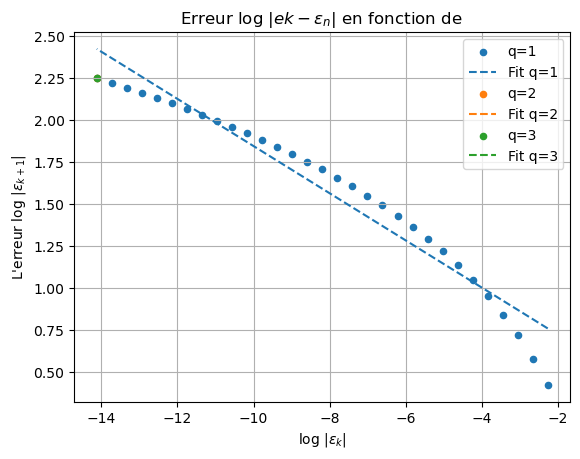

In [12]:
# Définition de la fonction point_fixe4 pour collecter les valeurs de log(e_k) et log(e_k+1)
def point_fixe4(g, x0, tol, Nmax, r, q):
    while q < 4:
        x = g(x0)  # Calcul de la première approximation
        N = 0
        err = np.log(abs(x - x0))  # Calcul de log(e_k)
        err1 = np.log(abs(-np.sin(r) * err))  # Calcul de log(e_k+1)
        list_err = [err]
        list_err1 = [err1]

        while abs(x - x0) > tol:
            x0 = x  # Mise à jour de la valeur précédente
            x = g(x0)  # Calcul de la prochaine approximation
            N += 1
    
            if N >= Nmax:
                break

            err = np.log(abs(x - x0))  # Calcul de log(e_k)
            err1 = np.log(abs(-np.sin(r) * err))  # Calcul de log(e_k+1)
            list_err.append(err)  # Ajout de log(e_k) à la liste
            list_err1.append(err1)  # Ajout de log(e_k+1) à la liste

        #Tracer les erreurs pour chaque q
        plt.scatter(list_err, list_err1, s=20, label = f'q={q}')
        
        #Ajuster les points par une droite
        fit = np.polyfit(list_err, list_err1, 1)
        plt.plot(list_err, np.polyval(fit, list_err), label = f'Fit q={q}', linestyle = '--')
        
        q+=1
            
        
    return fit[0] #Retourner le coefficient directeur (pente) pour le dernier q



# Exemple d'utilisation de la fonction point_fixe4
fit_slope = point_fixe4(lambda x: np.cos(x), 0.8, 1E-6, 100, 0.7390855741535659, 1)

#Afficher la legende et le titre du graphique 

plt.legend()
plt.title ("Erreur log "r"$|ek - \varepsilon_{n}|$"" en fonction de ")
plt.xlabel("log "r"$|\varepsilon_{k}|$")
plt.ylabel("L'erreur log "r"$|\varepsilon_{k+1}|$")

plt.grid()
plt.show()


Nous observons que la convergence est quadratique. Nous pourrons donc assumer que la méthode du point fixe est d'ordre 2.

Calculons donc le <u>Facteur de Convergence</u>:

In [13]:
def point_fixe4(g, x0, tol, Nmax, r):
    fit_slopes = []  # Liste pour stocker les facteurs de convergence pour chaque q
    
    for q in range(1, 4):  # Boucle pour q allant de 1 à 3 inclus
        x = x0
        N = 0
        list_err = []
        list_err1 = []

        while True:
            x = g(x)  # Calcul de la prochaine approximation
            N += 1

            err = np.log(abs(x - x0))  # Calcul de log(e_k)
            err1 = np.log(abs(-np.sin(r) * err))  # Calcul de log(e_k+1)
            list_err.append(err)  # Ajout de log(e_k) à la liste
            list_err1.append(err1)  # Ajout de log(e_k+1) à la liste

            if abs(x - x0) <= tol or N >= Nmax:
                break

            x0 = x  # Mise à jour de la valeur précédente
        
        # Ajuster les points par une droite pour chaque q
        fit = np.polyfit(list_err, list_err1, 1)
        fit_slopes.append(fit[0])  # Ajouter le facteur de convergence à la liste
    
    return fit_slopes  # Retourner la liste des facteurs de convergence pour chaque q

# Appel de la fonction point_fixe4 pour obtenir les facteurs de convergence
fit_slopes = point_fixe4(lambda x: np.cos(x), 0.8, 1E-6, 100, 0.7390855741535659)

# Affichage des facteurs de convergence pour chaque q
print("Facteurs de Convergence:")
print(f"q = 1: {fit_slopes[0]}")
print(f"q = 2: {fit_slopes[1]}")
print(f"q = 3: {fit_slopes[2]}")

Facteurs de Convergence:
q = 1: -0.14049768535849527
q = 2: -0.07976441494232718
q = 3: -0.07976441494232718


C:\Users\Kaya\AppData\Local\Temp\ipykernel_24496\4244558303.py:31: RankWarning: Polyfit may be poorly conditioned
  fit_slopes = point_fixe4(lambda x: np.cos(x), 0.8, 1E-6, 100, 0.7390855741535659)
C:\Users\Kaya\AppData\Local\Temp\ipykernel_24496\4244558303.py:31: RankWarning: Polyfit may be poorly conditioned
  fit_slopes = point_fixe4(lambda x: np.cos(x), 0.8, 1E-6, 100, 0.7390855741535659)


Des valeurs de facteur de convergence plus élevées (supérieures à 1) indiquent des taux de convergence plus lents, ce qui signifie que la méthode nécessite davantage d'itérations pour atteindre le niveau de tolérance souhaité.
Ceci n'est pas notre cas.

Des valeurs plus petites (proches de 1 ou inférieures) suggèrent des taux de convergence plus rapides, indiquant que la méthode converge plus rapidement.

Voici l'interprétation de nos valeurs obtenues des facteurs de convergence:

<strong>Diminution significative</strong> : Une réduction notable du coefficient de convergence est observée lors du passage de q = 1 à q = 2, indiquant une amélioration dans la vitesse de convergence. Cependant, la variation entre q = 2 et q = 3 ne montre pas de changement significatif, suggérant un plateau dans la vitesse de convergence pour ces valeurs de q.

<strong>Amélioration initiale</strong> : La diminution du coefficient de convergence entre q = 1 et q = 2 suggère une amélioration initiale de la convergence à mesure que q augmente. Cependant, cette amélioration semble se stabiliser entre q = 2 et q = 3, indiquant une convergence plus lente ou constante pour des valeurs de q supérieures.



### Exercice A.2: 

On veut calculer la racine de la fonction f(x) = x² - 2 dans l'intervalle [0;2] avec unee tolérance de 1E-4.


La <strong>Méthode de Lagrange</strong> est un algorithme qui sert à rechercher la racine d'une fonction. Cette méthode est une variation de la dichtomie, mais nous ne prennons pas le point C qui est le milieu de l'intervalle, mais plutôt, on prend le point C à l'intersection de la sécante et à l'axe des x.
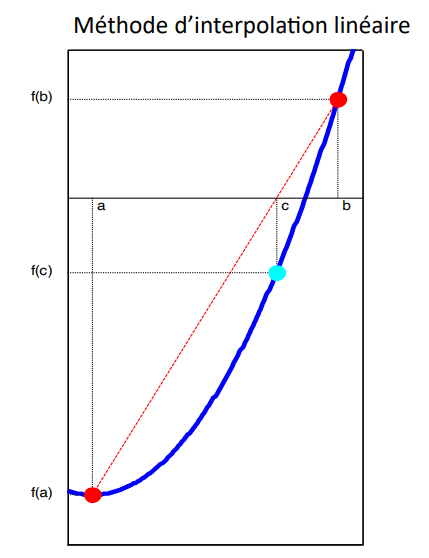
Sa formule est le suivant:
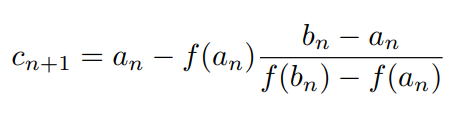

In [14]:
def Lagrange(f, a, b, N, E):
    k=0
    ak=a
    bk=b
    xk=ak-(bk-ak)*f(ak)/(f(bk)-f(ak))
    while bk-ak>E or abs(f(xk))>E:
        if f(ak)*f(xk)<0 : 
            bk=xk
        else : 
            ak=xk 
        k=k+1
        if k==N :
            print("nombre d'itération N est atteint")
            break
        xk=ak-(bk-ak)*f(ak)/(f(bk)-f(ak))
        
    return xk, k 

result = Lagrange(lambda x: (x**2)-2, 0, 2, 100, 1E-4)
# Intervalle [a,b] = [0,2]
# Nmax = 100 car la valeur n'est pas atteint (après essai)
# Tolérance = 1E-4
print("Racine trouvée: ", result)

Racine trouvée:  (1.414213562373095, 22)


Notre résultat a 2 valeurs:

- La première est l'approximation final de la racine.
- La deuxième est le nombre total d'itérations fait par la méthode de Lagrange

Ce que nous constatons avec cette méthode, c'est que l'intervalle initial [0,2] ne délimite pas adéquatement la racine de l'équation. Par conséquent, la méthode de Lagrange ne semble pas fonctionner efficacement avec cet intervalle, et une sélection d'intervalle différente pourrait être nécessaire pour garantir une convergence correcte.

Completer le tableau ci - dessous:

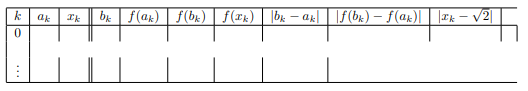

In [15]:
def lagrange_table(f, a, b, nmax, E):
    k = 0  # Itération
    ak = a
    bk = b
    xk = ak - (bk - ak) * f(ak) / (f(bk) - f(ak))
    
    # Dictionnaire pour stocker les données spécifiques à chaque itération
    data = {
        'k': [],  # Numéro d'itération
        '$a_k$': [],  # Valeur de ak
        '$x_k$': [],  # Valeur de xk
        '$b_k$': [],  # Valeur de bk
        '$f(a_k)$': [],  # Valeur de f(ak)
        '$f(b_k)$': [],  # Valeur de f(bk)
        '$f(x_k)$': [],  # Valeur de f(xk)
        '|$b_k$-$a_k$|': [],  # Valeur absolue de bk - ak
        '|$f(b_k)$-$f(a_k)$|': [],  # Valeur absolue de f(bk) - f(ak)
        '|$x_k$-$\sqrt{2}$|': []  # Valeur absolue de xk - racine carrée de 2
    }
    
    while bk - ak > E or abs(f(xk)) > E:         
        if f(ak) * f(xk) < 0:
            bk = xk
        else:
            ak = xk
        k += 1

        if k == nmax:
            print("Arrêt car le N° d'itérations est atteint")
            break
            
        xk = ak - (bk - ak) * f(ak) / (f(bk) - f(ak))
        
        # Calcul des valeurs pour le tableau
        f_ak = f(ak)
        f_bk = f(bk)
        f_xk = f(xk)
        abs_bk_ak = abs(bk - ak)
        abs_f_bk_f_ak = abs(f_bk - f_ak)
        abs_xk_sqrt = abs(xk - 2**(1/2))
        
        # Ajout des valeurs dans le dictionnaire
        data['k'].append(k)
        data['$a_k$'].append(ak)
        data['$x_k$'].append(xk)
        data['$b_k$'].append(bk)
        data['$f(a_k)$'].append(f_ak)
        data['$f(b_k)$'].append(f_bk)
        data['$f(x_k)$'].append(f_xk)
        data['|$b_k$-$a_k$|'].append(abs_bk_ak)
        data['|$f(b_k)$-$f(a_k)$|'].append(abs_f_bk_f_ak)
        data['|$x_k$-$\sqrt{2}$|'].append(abs_xk_sqrt)
        
    df = pd.DataFrame(data)
    return df

# Appel de la fonction lagrange_table modifiée pour générer le tableau
result_table = lagrange_table(lambda x: (x**2) - 2, 0, 2, 100, 1E-4)
print(result_table)

     k     $a_k$     $x_k$     $b_k$      $f(a_k)$      $f(b_k)$  \
0    1  1.000000  1.333333  2.000000 -1.000000e+00  2.000000e+00   
1    2  1.333333  1.400000  2.000000 -2.222222e-01  2.000000e+00   
2    3  1.400000  1.411765  2.000000 -4.000000e-02  2.000000e+00   
3    4  1.411765  1.413793  2.000000 -6.920415e-03  2.000000e+00   
4    5  1.413793  1.414141  2.000000 -1.189061e-03  2.000000e+00   
5    6  1.414141  1.414201  2.000000 -2.040608e-04  2.000000e+00   
6    7  1.414201  1.414211  2.000000 -3.501278e-05  2.000000e+00   
7    8  1.414211  1.414213  2.000000 -6.007287e-06  2.000000e+00   
8    9  1.414213  1.414213  2.000000 -1.030689e-06  2.000000e+00   
9   10  1.414213  1.414214  2.000000 -1.768383e-07  2.000000e+00   
10  11  1.414214  1.414214  2.000000 -3.034065e-08  2.000000e+00   
11  12  1.414214  1.414214  2.000000 -5.205633e-09  2.000000e+00   
12  13  1.414214  1.414214  2.000000 -8.931456e-10  2.000000e+00   
13  14  1.414214  1.414214  2.000000 -1.532394e-

Tracer |f(bk| − f(ak)|, |xk+1 − xk| en fonction de k.

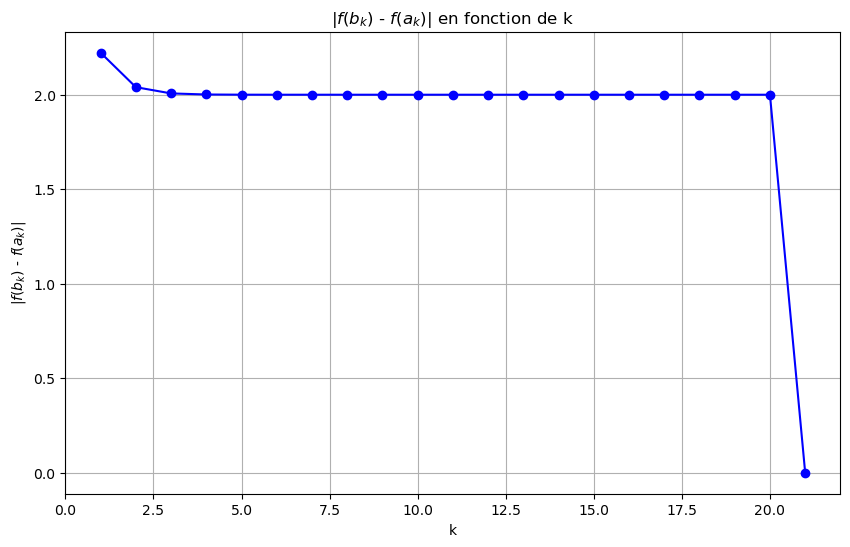

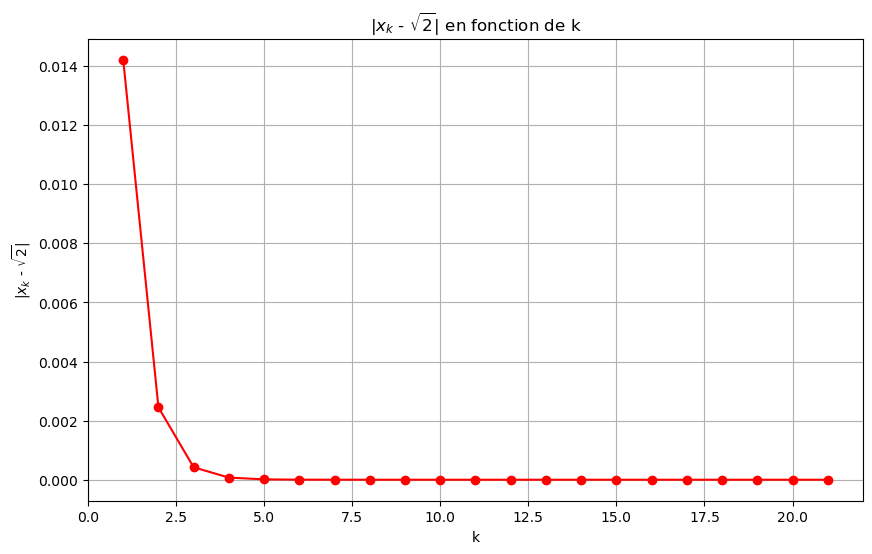

In [16]:
# Récupération des données de la fonction lagrange_table
result_table =lagrange_table(lambda x: (x**2) - 2, 1, 2, 100, 1E-4)

# Extraction des données pour les graphiques
abs_f_diff = result_table['$f(b_k)$'] - result_table['$f(a_k)$']
abs_x_diff = result_table['|$x_k$-$\sqrt{2}$|']

# Création du graphique pour |f(bk)−f(ak)| en fonction de k
plt.figure(figsize=(10, 6))
plt.plot(result_table['k'], abs_f_diff, marker='o', linestyle='-', color='blue')
plt.xlabel('k')
plt.ylabel('|$f(b_k)$ - $f(a_k)$|')
plt.title('|$f(b_k)$ - $f(a_k)$| en fonction de k')
plt.grid(True)
plt.show()

# Création du graphique pour |xk+1−xk| en fonction de k
plt.figure(figsize=(10, 6))
plt.plot(result_table['k'], abs_x_diff, marker='o', linestyle='-', color='red')
plt.xlabel('k')
plt.ylabel('|$x_k$ - $\sqrt{2}$|')
plt.title('|$x_k$ - $\sqrt{2}$| en fonction de k')
plt.grid(True)
plt.show()

La <strong>Méthode de Newton</strong> est une méthode utilisé pour résoudre les équations linéaire ou non-linéaire.
Nous cherchons une correction δx, <br>telle que f(x<sub>0</sub>) + δx) = 0
<br> Passons au dévéloppement de Taylor:
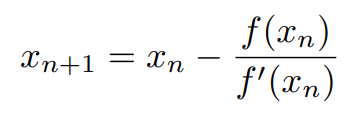

In [17]:
def Newton(f, fprime,N, E, i): 
    k=0
    x=i-f(i)/fprime(i)
    while abs((x-i)/x)>E:
        if k==N :
            print("nombre d'itération N est atteint")
            break
        i=x
        x=i-f(i)/fprime(i)
        k=k+1
    return i, k 

result = Newton(lambda x: (x**2) - 2, lambda x: 2*x, 100, 1E-4,2 )
print("Racine Trouvée: ", result)

Racine Trouvée:  (1.4142156862745099, 3)


Notre résultat a 3 valeurs:
- La première est l'approximation final de la racine. 
- La deuxième valeur est la valeur final de delta qui est la difference entre les 2 dernieres approximations
- La troisième valeur, est le nombre total d'itérations fait par la méthode de Newton.

Completer le tableau ci - dessous:

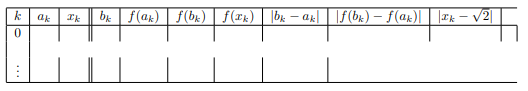

In [18]:
def newton_table(f, fprime, x0, epsilon):
    delta = 1  # Initialisation du delta à une valeur arbitraire
    k = 0  # Initialisation du compteur d'itérations
    x = x0  # Initialisation de x avec la valeur initiale x0
    
    # Dictionnaire pour stocker les données spécifiques à chaque itération
    data = {
        'k': [],  # Numéro d'itération
        '$x_k$': [],  # Valeur de xk
        '$f(x_k)$': [],  # Valeur de f(xk)
        '|$x_k$-$\sqrt{2}$|': []  # Valeur absolue de xk - racine carrée de 2
    }
    
    # Boucle tant que la différence entre deux itérations successives est supérieure à epsilon
    while delta > epsilon:
        h = x - f(x) / fprime(x)  # Calcul de la nouvelle valeur de x
        delta = abs(h - x)  # Calcul de la différence entre les deux valeurs de x
        x = h  # Mise à jour de la valeur de x avec la nouvelle valeur
        k += 1  # Incrémentation du compteur d'itérations
        
        # Calcul des valeurs pour le tableau
        f_x = f(x)  # Calcul de f(xk)
        abs_x_sqrt = abs(x - 2**(1/2))  # Calcul de |xk - racine carrée de 2|
        
        # Ajout des valeurs dans le dictionnaire
        data['k'].append(k)
        data['$x_k$'].append(x)
        data['$f(x_k)$'].append(f_x)
        data['|$x_k$-$\sqrt{2}$|'].append(abs_x_sqrt)
        
    df = pd.DataFrame(data)  # Création du DataFrame à partir des données collectées
    return df

# Appel de la fonction newton_table modifiée pour générer le tableau
result_table = newton_table(lambda x: (x**2) - 2, lambda x: 2*x, 1, 1E-4)
print(result_table)

   k     $x_k$      $f(x_k)$  |$x_k$-$\sqrt{2}$|
0  1  1.500000  2.500000e-01        8.578644e-02
1  2  1.416667  6.944444e-03        2.453104e-03
2  3  1.414216  6.007305e-06        2.123901e-06
3  4  1.414214  4.510614e-12        1.594724e-12


Tracer |f(bk| − f(ak)|, |xk+1 − xk| en fonction de k.

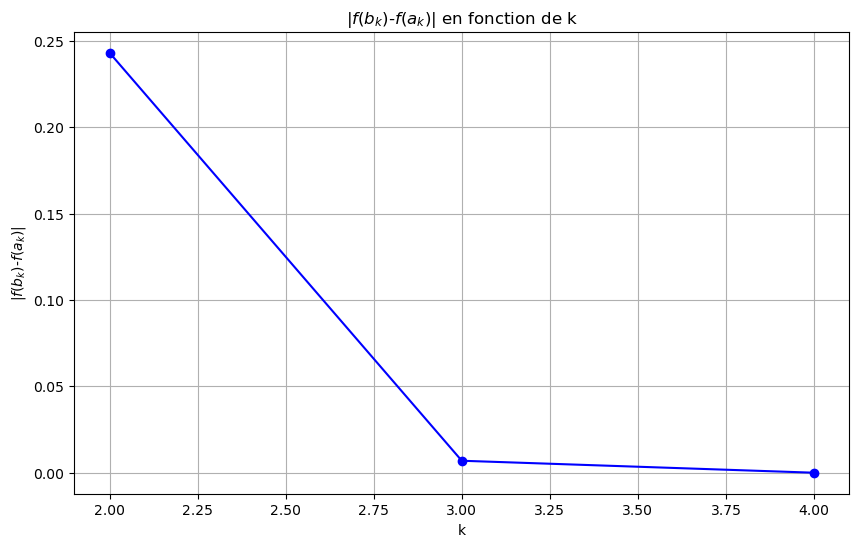

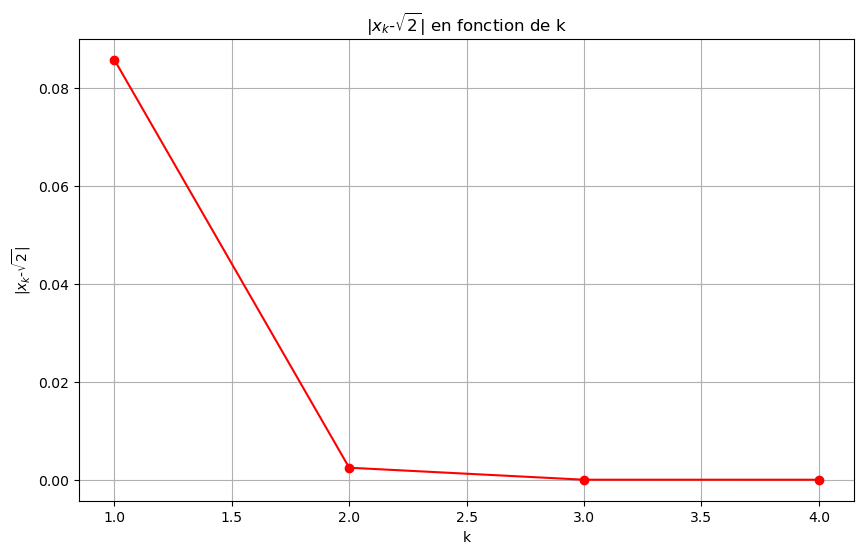

In [19]:
# Récupération des données de la fonction newton_table
result_table = newton_table(lambda x: (x**2) - 2, lambda x: 2*x, 1, 1E-4)

# Extraction des données pour les graphiques
abs_f_diff = result_table['$f(x_k)$'].diff().abs()
abs_x_diff = result_table['|$x_k$-$\sqrt{2}$|']

# Création du graphique pour |f(bk)−f(ak)| en fonction de k
plt.figure(figsize=(10, 6))
plt.plot(result_table['k'][1:], abs_f_diff[1:], marker='o', linestyle='-', color='blue')
plt.xlabel('k')
plt.ylabel('|$f(b_k)$-$f(a_k)$|')
plt.title('|$f(b_k)$-$f(a_k)$| en fonction de k')
plt.grid(True)
plt.show()

# Création du graphique pour |xk+1−xk| en fonction de k
plt.figure(figsize=(10, 6))
plt.plot(result_table['k'], abs_x_diff, marker='o', linestyle='-', color='red')
plt.xlabel('k')
plt.ylabel('|$x_k$-$\sqrt{2}$|')
plt.title('|$x_k$-$\sqrt{2}$| en fonction de k')
plt.grid(True)
plt.show()

La <strong>Méthode de Dichotomie</strong> est une méthode utilisé pour rechercher la racine d'une fonction. Elle divise continuellement un intervalle en deux parties égales et choisit le sous-intervalle où la fonction change de signe, se rapprochant ainsi de la racine de la fonction.
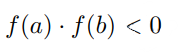
Si cela est le cas, nous avons une racine.

In [20]:
def dichotomie(f, a, b, nmax, E):
    k = 0 #Iteration
    ak = a
    bk = b
    xk = (ak + bk) / 2
    
    while bk - ak > E or abs(f(xk)) > E:         
        if f(ak) * f(xk) < 0:
            bk = xk
        else:
            ak = xk
        k += 1

        if k == nmax:
            print("Arrêt car le N° d'itérations est atteint")
            break
            
        xk = (ak + bk) / 2
        
    return xk, k

result = dichotomie(lambda x: (x**2)-2, 0, 2, 100, 1E-4)
# Intervalle [a,b] = [0,2]
# Nmax = 100 car la valeur n'est pas atteint (après essai)
# Tolérance = 1E-4
print("Racine trouvée: ", result)

Racine trouvée:  (1.414215087890625, 15)


Completer le tableau ci - dessous:

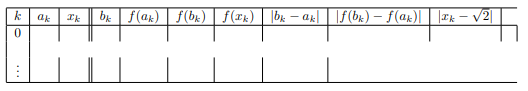

In [21]:
def dichotomie_table(f, a, b, nmax, E):
    k = 0  # Itération
    ak = a
    bk = b
    xk = (ak + bk) / 2
    
    # Dictionnaire pour stocker les données spécifiques à chaque itération
    data = {
        'k': [],  # Numéro d'itération
        '$a_k$': [],  # Valeur de ak
        '$x_k$': [],  # Valeur de xk
        '$b_k$': [],  # Valeur de bk
        '$f(a_k)$': [],  # Valeur de f(ak)
        '$f(b_k)$': [],  # Valeur de f(bk)
        '$f(x_k)$': [],  # Valeur de f(xk)
        '|$b_k$-$a_k$|': [],  # Valeur absolue de bk - ak
        '|$f(b_k)$-$f(a_k)$|': [],  # Valeur absolue de f(bk) - f(ak)
        '|$x_k$-$\sqrt{2}$|': []  # Valeur absolue de xk - racine carrée de 2
    }

    while bk - ak > E or abs(f(xk)) > E:         
        if f(ak) * f(xk) < 0:
            bk = xk
        else:
            ak = xk

        xk = (ak + bk) / 2
        
        # Calcul des valeurs pour le tableau
        f_ak = f(ak)
        f_bk = f(bk)
        f_xk = f(xk)
        abs_bk_ak = abs(bk - ak)
        abs_f_bk_f_ak = abs(f_bk - f_ak)
        abs_xk_np_sqrt_2 = abs(xk - 2**0.5)
        
        # Ajout des valeurs dans le dictionnaire
        data['k'].append(k)
        data['$a_k$'].append(ak)
        data['$x_k$'].append(xk)
        data['$b_k$'].append(bk)
        data['$f(a_k)$'].append(f_ak)
        data['$f(b_k)$'].append(f_bk)
        data['$f(x_k)$'].append(f_xk)
        data['|$b_k$-$a_k$|'].append(abs_bk_ak)
        data['|$f(b_k)$-$f(a_k)$|'].append(abs_f_bk_f_ak)
        data['|$x_k$-$\sqrt{2}$|'].append(abs_xk_np_sqrt_2)
        
        k += 1

        if k == nmax:
            print("Arrêt car le N° d'itérations est atteint")
            break

    df = pd.DataFrame(data)
    return df

# Appel de la fonction dichotomie_table modifiée pour générer le tableau
result_table = dichotomie_table(lambda x: (x**2)-2, 0, 2, 100, 1E-4)
print(result_table)

     k     $a_k$     $x_k$     $b_k$  $f(a_k)$  $f(b_k)$  $f(x_k)$  \
0    0  1.000000  1.500000  2.000000 -1.000000  2.000000  0.250000   
1    1  1.000000  1.250000  1.500000 -1.000000  0.250000 -0.437500   
2    2  1.250000  1.375000  1.500000 -0.437500  0.250000 -0.109375   
3    3  1.375000  1.437500  1.500000 -0.109375  0.250000  0.066406   
4    4  1.375000  1.406250  1.437500 -0.109375  0.066406 -0.022461   
5    5  1.406250  1.421875  1.437500 -0.022461  0.066406  0.021729   
6    6  1.406250  1.414062  1.421875 -0.022461  0.021729 -0.000427   
7    7  1.414062  1.417969  1.421875 -0.000427  0.021729  0.010635   
8    8  1.414062  1.416016  1.417969 -0.000427  0.010635  0.005100   
9    9  1.414062  1.415039  1.416016 -0.000427  0.005100  0.002336   
10  10  1.414062  1.414551  1.415039 -0.000427  0.002336  0.000954   
11  11  1.414062  1.414307  1.414551 -0.000427  0.000954  0.000263   
12  12  1.414062  1.414185  1.414307 -0.000427  0.000263 -0.000082   
13  13  1.414185  1.

Tracer |f(bk| − f(ak)|, |xk+1 − xk| en fonction de k.

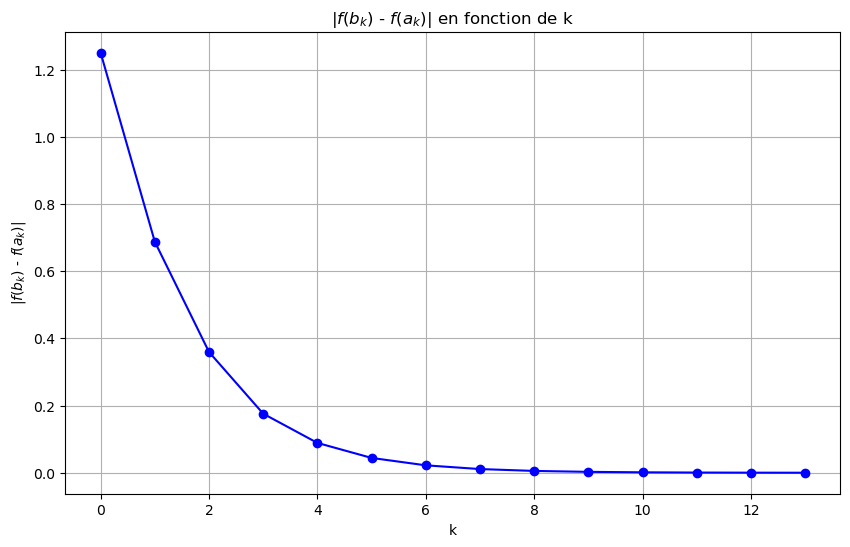

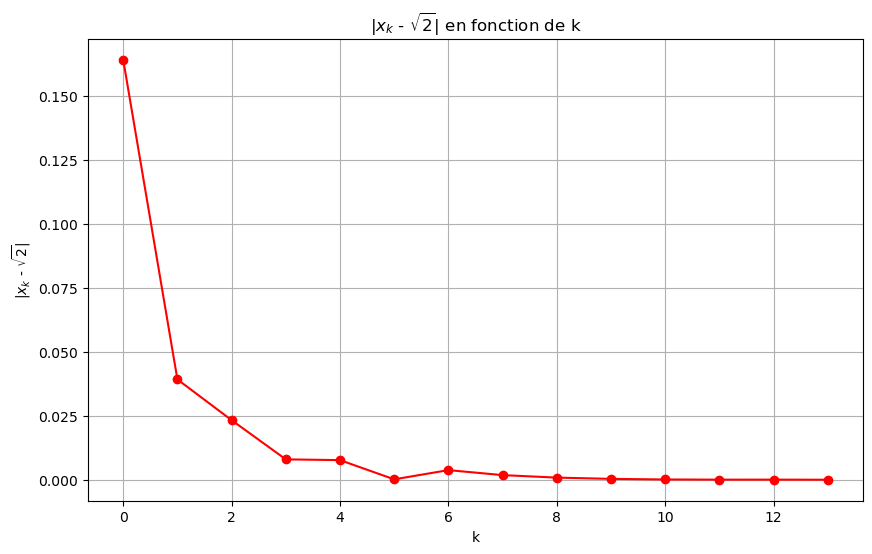

In [22]:
# Récupération des données de la fonction dichotomie_table
result_table = dichotomie_table(lambda x: (x**2) - 2, 1, 2,100, 1E-4)

# Extraction des données pour les graphiques
abs_f_diff = result_table['$f(b_k)$'] - result_table['$f(a_k)$']
abs_x_diff = result_table['|$x_k$-$\sqrt{2}$|']

# Création du graphique pour |f(bk)−f(ak)| en fonction de k
plt.figure(figsize=(10, 6))
plt.plot(result_table['k'], abs_f_diff, marker='o', linestyle='-', color='blue')
plt.xlabel('k')
plt.ylabel('|$f(b_k)$ - $f(a_k)$|')
plt.title('|$f(b_k)$ - $f(a_k)$| en fonction de k')
plt.grid(True)
plt.show()

# Création du graphique pour |xk+1−xk| en fonction de k
plt.figure(figsize=(10, 6))
plt.plot(result_table['k'], abs_x_diff, marker='o', linestyle='-', color='red')
plt.xlabel('k')
plt.ylabel('|$x_k$ - $\sqrt{2}$|')
plt.title('|$x_k$ - $\sqrt{2}$| en fonction de k')
plt.grid(True)
plt.show()


Comparer les résultats des trois méthodes et concluez.

<u>Camparaison des 3 méthodes:</u>

1. <strong>Méthode de Lagrange</strong>
- Elle nécessite un intervalle initial approprié qui englobe la racine.
- La convergence peut être sensible au choix de l'intervalle initial.
- Le résultat inclut l'approximation de la racine et le nombre d'itérations.
La méthode de Lagrange peut ne pas être aussi robuste que les méthodes de Newton ou de Dichotomie pour tous types de fonctions, surtout si l'intervalle initial n'est pas choisi avec soin.

2. <strong>Méthode de Newton</strong>
- Elle converge rapidement, nécessitant généralement moins d'itérations.
- Le résultat inclut des informations sur l'approximation de la racine, la différence entre les approximations successives (delta) et le nombre d'itérations.
La méthode de Newton reste un choix solide pour sa convergence rapide et les informations supplémentaires sur la convergence.

3. <strong>Dichotomie</strong>
- Elle converge plus lentement par rapport à la méthode de Newton.
- Le résultat inclut uniquement l'approximation finale de la racine.
La méthode de Dichotomie est fiable et simple, adaptée aux cas où la simplicité est préférée à la rapidité.


Le choix entre ces méthodes dépend des caractéristiques spécifiques de la fonction et de l'équilibre souhaité entre l'efficacité computationnelle et la simplicité.

### Exercice A.3: FONCTION DE RUNGE

On analyse la fonction de Runge f(x) sur l'intervalle [-1,1]. Programmer en python les fonctions associées à l'interpolation de Lagrange, et l'interpolation de Newton. En utilisant successivement 3, 5, 10, 20 et 50 points équi-repartis sur l'intervalle, et en utilisant les fonctions que vous avez écrites précédemment en python, tracer les polynômes P(x).


Nous pouvons tracer les polynômes P(x), avec les deux méthodes d'interpolation: Lagrange ou Newton.

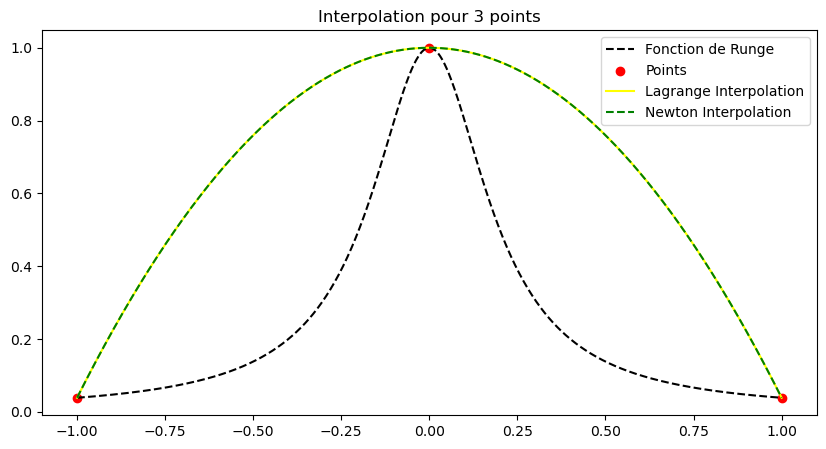

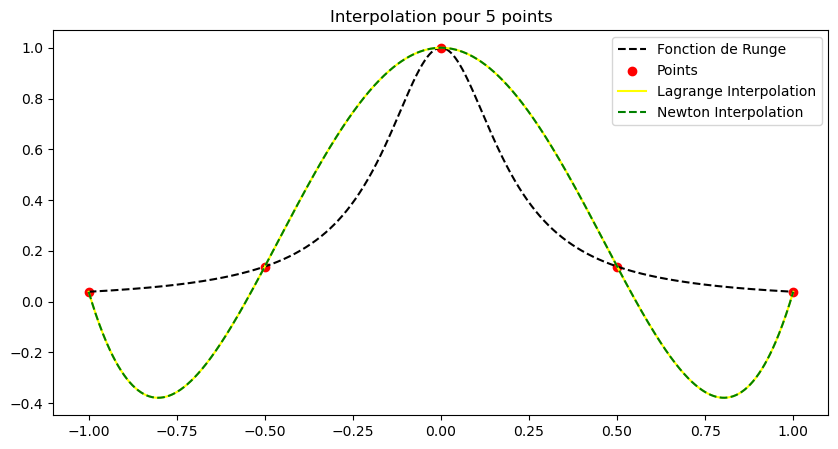

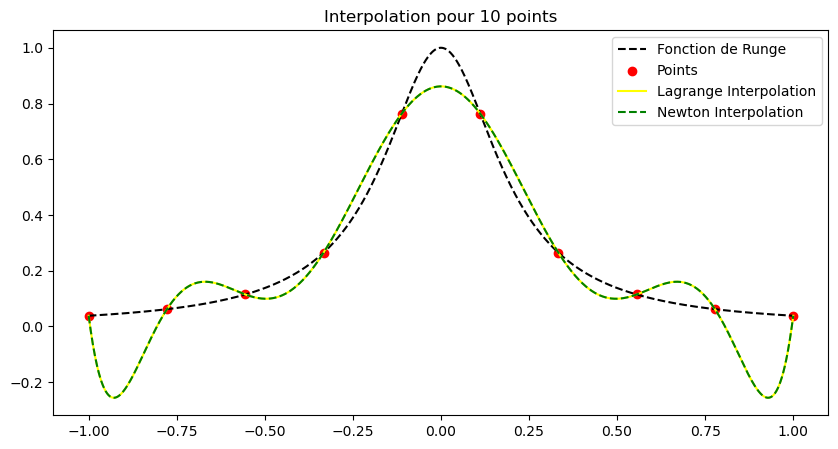

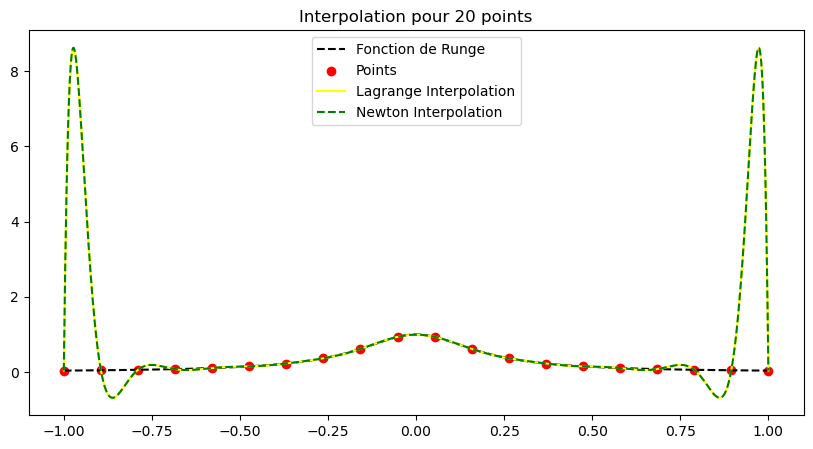

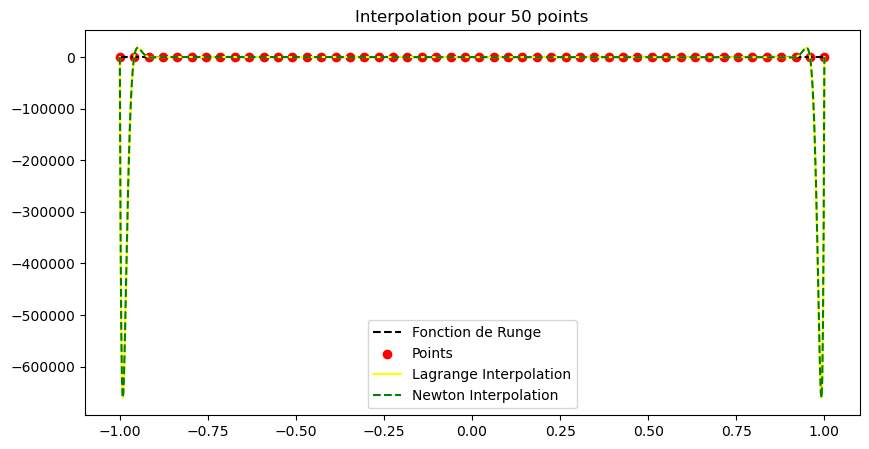

In [23]:
def fonction(x):
    return 1 / (1 + 25 * x**2)

def lagrange(x, xi, yi):
    resultat = 0
    for j in range(len(xi)):
        terme = yi[j]
        for k in range(len(xi)):
            if k != j:
                terme = terme * (x - xi[k]) / (xi[j] - xi[k])
        resultat += terme
    return resultat

def newton(x, xi, yi):
    n = len(xi)
    der= np.zeros((n, n))

    # Calcul des différences divisées
    der[:, 0] = yi
    for j in range(1, n):
        for i in range(n - j):
            der[i, j] = (der[i + 1, j - 1] - der[i, j - 1]) / (xi[i + j] - xi[i])

    resultat = der[0, 0]
    for j in range(1, n):
        terme = 1
        for i in range(j):
            terme *= (x - xi[i])
        resultat += terme * der[0, j]

    return resultat

# Définir l'intervalle et le nombre de points
a = -1
b = 1
points = [3, 5, 10, 20, 50]

# Générer les points équi-répartis
for point in points:
    xi = np.linspace(a, b, point)
    yi = fonction(xi)

    # Générer des points pour le tracé
    x_plot = np.linspace(a,b, 1000)

    # Interpolation de Lagrange
    y_lagrange = [lagrange(x, xi, yi) for x in x_plot]

    # Interpolation de Newton
    y_newton = [newton(x, xi, yi) for x in x_plot]

    # Tracer les résultats
    plt.figure(figsize=(10, 5))
    plt.plot(x_plot, fonction(x_plot), label="Fonction de Runge", linestyle="--", color="black")
    plt.scatter(xi, yi, color="red", label="Points")
    plt.plot(x_plot, y_lagrange, label="Lagrange Interpolation", color = "yellow")
    plt.plot(x_plot, y_newton, label="Newton Interpolation", linestyle="--", color = "green")
    plt.title(f'Interpolation pour {point} points')
    plt.legend()
    plt.show()

Calculer l'erreur maximale commise (norme maximale): Max|P(x)-f(x)|

In [24]:
erreurs_lagrange = []
erreurs_newton = []
def max_erreur(f, f_interpolation):
    return np.max(np.abs(f - f_interpolation))

for point in points:
    xi = np.linspace(a, b, point)
    yi = fonction(xi)

    
    y_lagrange = np.array([lagrange(x, xi, yi) for x in x_plot])

    
    y_newton = np.array([newton(x, xi, yi) for x in x_plot])

    max_erreur_lagrange =max_erreur(fonction(x_plot), y_lagrange)
    max_erreur_newton = max_erreur(fonction(x_plot), y_newton)

    erreurs_lagrange.append(max_erreur_lagrange)
    erreurs_newton.append(max_erreur_newton)

   


for i, point in enumerate(points):
    print(f'Max erreur pour la méthode de Lagrange pour {point} points: {erreurs_lagrange[i]}')
    print(f'Max erreur pour la méthode de Newton pour {point} points: {erreurs_newton[i]}')
#plus de points plus d'erreur 

Max erreur pour la méthode de Lagrange pour 3 points: 0.6462285423402675
Max erreur pour la méthode de Newton pour 3 points: 0.6462285423402677
Max erreur pour la méthode de Lagrange pour 5 points: 0.4383497951290457
Max erreur pour la méthode de Newton pour 5 points: 0.4383497951290456
Max erreur pour la méthode de Lagrange pour 10 points: 0.300284543517558
Max erreur pour la méthode de Newton pour 10 points: 0.30028454351755646
Max erreur pour la méthode de Lagrange pour 20 points: 8.575360826439617
Max erreur pour la méthode de Newton pour 20 points: 8.575360826445278
Max erreur pour la méthode de Lagrange pour 50 points: 660564.9315783398
Max erreur pour la méthode de Newton pour 50 points: 660564.9313905973


Qu'en déduisez-vous?

Nous pouvons déduire le suivant:

<strong>1. Augmentation du nombre de points d'échantillonnage :</strong>
<br>Lorsque le nombre de points d'échantillonnage augmente, la précision de l'interpolation avec les deux méthodes s'améliore. En général, plus il y a de points, plus l'interpolation se rapproche de la fonction réelle dans l'intervalle spécifié.
Cela est illustré par les courbes tracées, montrant une meilleure adéquation des courbes d'interpolation aux courbes de la fonction réelle à mesure que le nombre de points augmente.


<strong>2. Comparaison entre la méthode de Lagrange et celle de Newton :</strong>
<br>Les deux méthodes donnent des résultats fortement similaires en termes de précision d'interpolation lorsque le nombre de points est suffisamment élevé (Les courbes sont super posées). Cependant, pour des quantités de points relativement faibles, l'une des méthodes peut présenter une précision légèrement supérieure à l'autre, dépendant de la répartition des points d'échantillonnage.


<strong>3. Erreurs d'interpolation :</strong>
<br>En calculant les erreurs maximales entre les interpolations et la fonction réelle, nous constatons que, ces erreurs augmente avec le nombre de points qui en conséquence augmentera le degré de notre polynôme. 
De plus, il est important de noter que les erreurs d'interpolation diffèrent légèrement entre la méthode de Lagrange et celle de Newton pour un même nombre de points.

Vous sélectionnez maintenant un ensemble de points dits de Chebychev 
<br>x<sub>k</sub> = 1/2 (a + b) + 1/2 (b - a) * cos((2k-1)/2n) * π), k = 1,..., n.
<br>En utilisant successivement k=3, 5, 10, 20 et 50 points, tracer les polynômes P(x) et calculez l’erreur de norme maximale commise Max|P(x) − f(x)| obtenus sur les points interpolés. Conclure

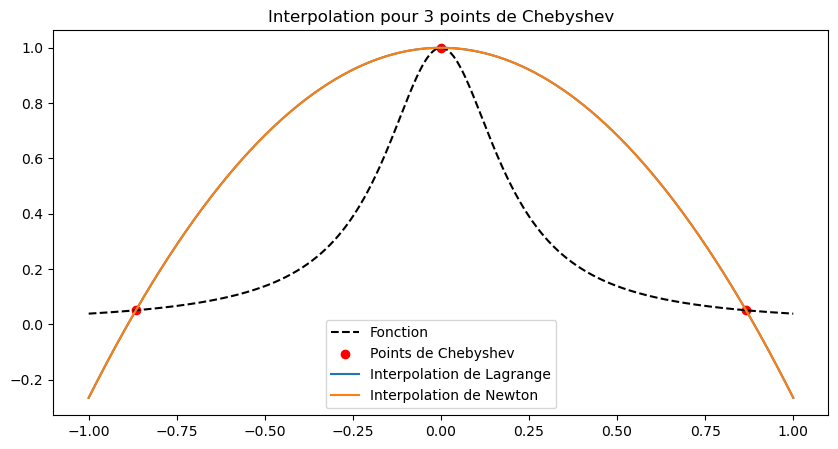

Max erreur pour Lagrange pour 3 points de Chebyshev: 0.6005975848937682
Max erreur pour Newton pour 3 points de Chebyshev: 0.6005975848937685


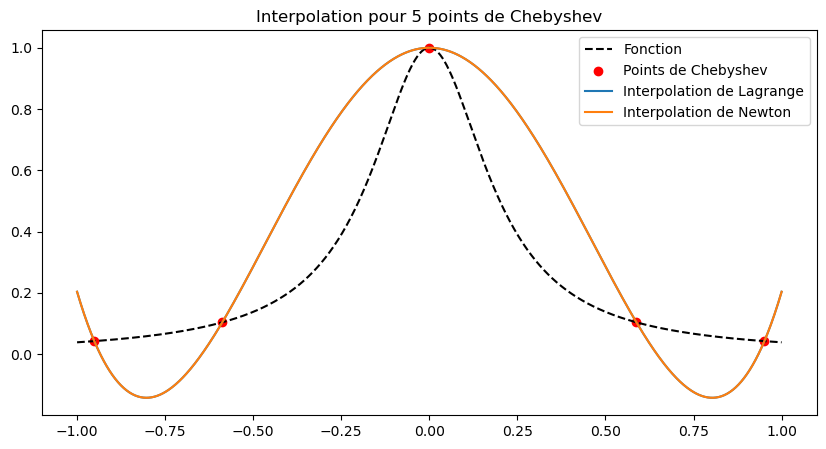

Max erreur pour Lagrange pour 5 points de Chebyshev: 0.40201457281998154
Max erreur pour Newton pour 5 points de Chebyshev: 0.40201457281998154


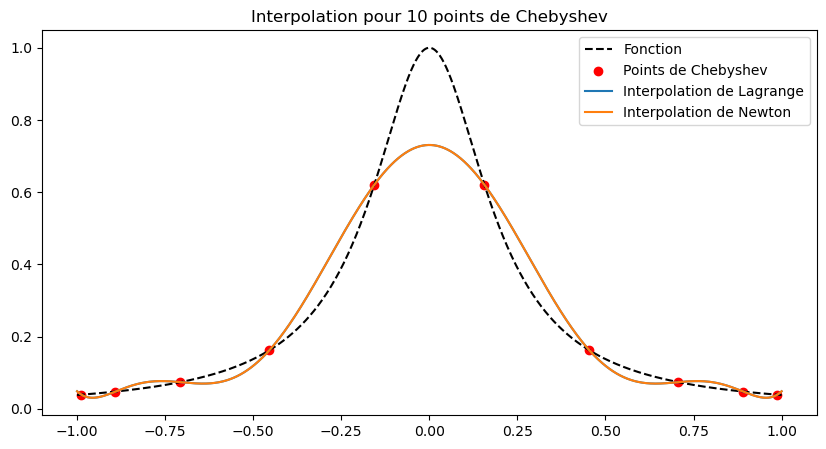

Max erreur pour Lagrange pour 10 points de Chebyshev: 0.26915810714735466
Max erreur pour Newton pour 10 points de Chebyshev: 0.26915810714735466


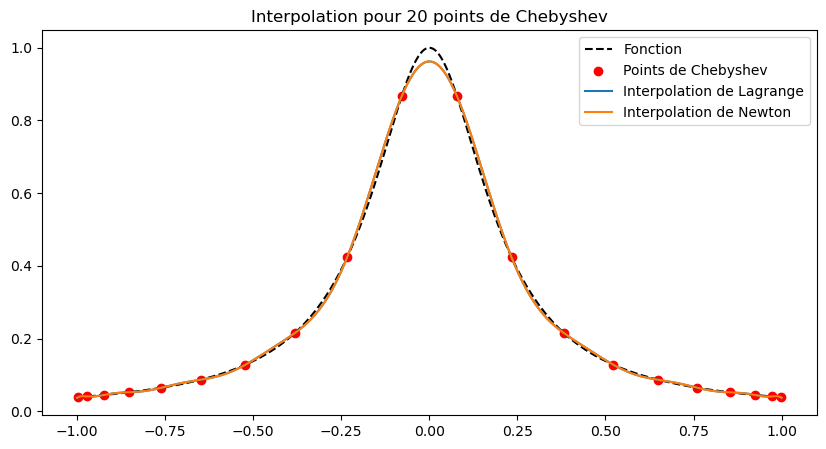

Max erreur pour Lagrange pour 20 points de Chebyshev: 0.03758185458922014
Max erreur pour Newton pour 20 points de Chebyshev: 0.037581854589220254


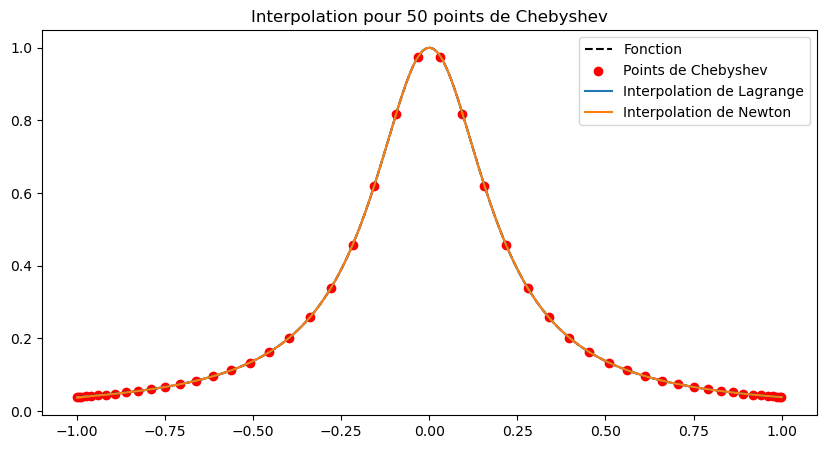

Max erreur pour Lagrange pour 50 points de Chebyshev: 9.68219903485501e-05
Max erreur pour Newton pour 50 points de Chebyshev: 0.0020641283242633923


In [25]:
def chebyshev_points(a, b, points):
    k = np.arange(1, points + 1)
    xk = 0.5 * (a + b) + 0.5 * (b - a) * np.cos(((2 * k - 1) * np.pi) / (2 * points))
    return xk


x_plot = np.linspace(a, b, 1000)

for point in points:
    xi_chebyshev = chebyshev_points(a, b, point)
    yi_chebyshev = fonction(xi_chebyshev)

    y_lagrange_chebyshev = np.array([lagrange(x, xi_chebyshev, yi_chebyshev) for x in x_plot])

    y_newton_chebyshev = np.array([newton(x, xi_chebyshev, yi_chebyshev) for x in x_plot])

   
    max_erreur_lagrange_chebyshev = max_erreur(fonction(x_plot), y_lagrange_chebyshev)
    max_erreur_newton_chebyshev =max_erreur(fonction(x_plot), y_newton_chebyshev)

   
    plt.figure(figsize=(10, 5))
    plt.plot(x_plot, fonction(x_plot), label="Fonction", linestyle="--", color="black")
    plt.scatter(xi_chebyshev, yi_chebyshev, color="red", label="Points de Chebyshev")
    plt.plot(x_plot, y_lagrange_chebyshev, label="Interpolation de Lagrange")
    plt.plot(x_plot, y_newton_chebyshev, label="Interpolation de Newton")
    plt.title(f'Interpolation pour {point} points de Chebyshev')
    plt.legend()
    plt.show()

   
    print(f'Max erreur pour Lagrange pour {point} points de Chebyshev: {max_erreur_lagrange_chebyshev}')
    print(f'Max erreur pour Newton pour {point} points de Chebyshev: {max_erreur_newton_chebyshev}')

## PARTIE C

### Exercice C.1: ECOULEMENT FLUIDE

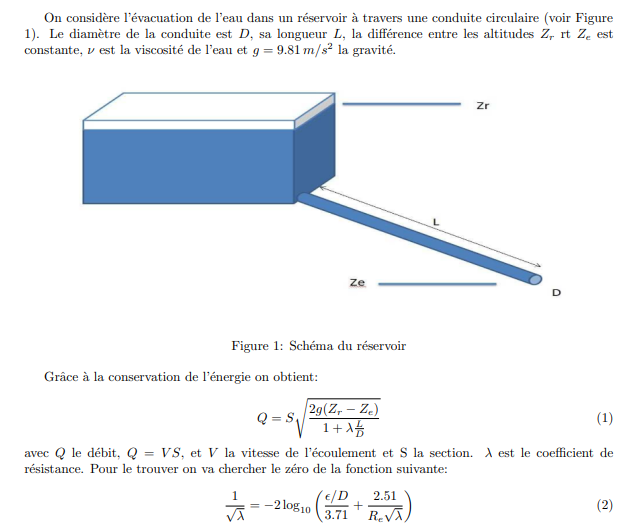
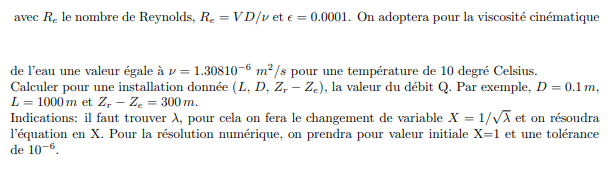

Pour calculer le débit, il nous faudra d'abord calculer le coefficient de la perte de charge(λ).
<br>Suite au changement de variable X = 1/√λ; nous obtenons l'equation de Colebrook suivant:
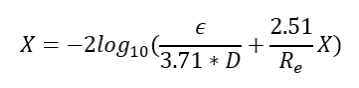

Nous reconnaissons la forme: X = g(x)
<br> Nous pouvons donc résoudre numériquement cette équation en trouvant le(s) point(s) fixe(s) de g(X).

In [26]:
#Définir l'ensemble des données:

g = 9.81 # gravité
H = 300 # H = Zr - Ze (la difference entre les altitudes) en metre
e = 1E-4 # la rugosité ε
v = 1.308*10**(-6) # la viscosité cinématique ν
D = 0.1 #Diamètre du conduite en metre
L = 1000 #Longueur du conduite en metre

Nous savons aussi que:

<center>Q = S * V</center>

avec V, la vitesse d'écoulement: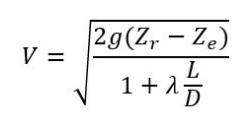

Donc: 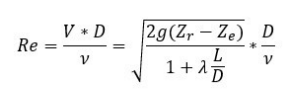

<strong>L'Equation de Colebrook devient:</strong>
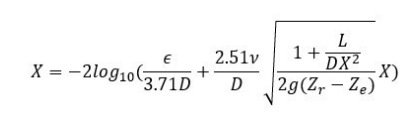

Nous avons résolu les intégrales et nous avons pu déterminé la constante par la condition initiale: v(0) = 0


<br>On applique la méthode du point fixe que nous avons programmer précédemment pour résoudre numériquement cet équation:

In [27]:
#Définir la fonction g(X)
def G(x):
    y = -2 * np.log10( (e / (3.71*D)) + ((2.51*v) / D) * np.sqrt( ( 1 + (L/(D * x**2)) ) / (2 * g * H))*x)
    
    return y

In [28]:
# Calculons l'équation X avec nos conditions initiales X = 1 et Nmax = 200
Xpf = point_fixe(lambda x: -2 * np.log10( (e / (3.71*D)) + ((2.51*v) / D) * np.sqrt( ( 1 + (L/(D * x**2)) ) / (2 * g * H))*x), 1, 1E-6, 200)

#Lambda represent G(x)

# Calculons notre coefficient de perte de charge à l'aide de la valeur de X trouvée à l'aide du point
fricfact = 1 / (Xpf**2) #Voici le factor de friction qui caracterise la quntité de friction ou resistance dans un écoulement d'un fluide dans une conduite
print("Coefficient de perte de charge:",fricfact)

#Calculons la valeur du débit recherchée:
Q = (((np.pi)* D**2) / 4) * np.sqrt((2 * g * H) / (1 + fricfact * (L / D)))
print("Débit: ", Q, "m^3/s" )

Coefficient de perte de charge: 0.020347264104966206
Débit:  0.042138823584639204 m^3/s


Nous trouvons un débit d'environ 4,21*10<sup>-2</sup> m<sup>3</sup>/s, soit 42,1 l/s.

### Exercice C.2: FROTTEMENT FLUIDE

On considère l'évolution temporelle d'une grandeur caracteristique ici la vitesse d'un parachtiste tombant en chute libre en étant soumis à des frottements quadratiques. L'application du principe fondamental de la dynamique conduit à l'équation differentielle suivante.
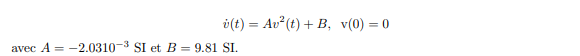

On souhaite résoudre cette équation differentielle. Pour cela, on choisit un pas de temps de 1 seconde et on étudie le mouvement sur 30 secondes. Implémentez la méthode de Runge-Kutta d'ordre 2 puis d'ordre 4 et comparez les résultats obtenues d'une part avec la méthode d'Euler explicite et la méthode d'Euler implicite et d'autre part la solution analytique du problème.


In [29]:
#Nous allons commencé par essayer de déterminer la solution analytique de notre équation
#Initialisons nos constantes
A = -2.03 * 10**(-3)
B = 9.81

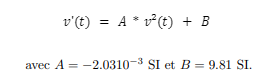
Pour résoudre l'équation différentielle à variables séparables analytiquement:
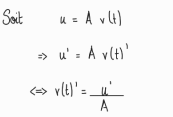
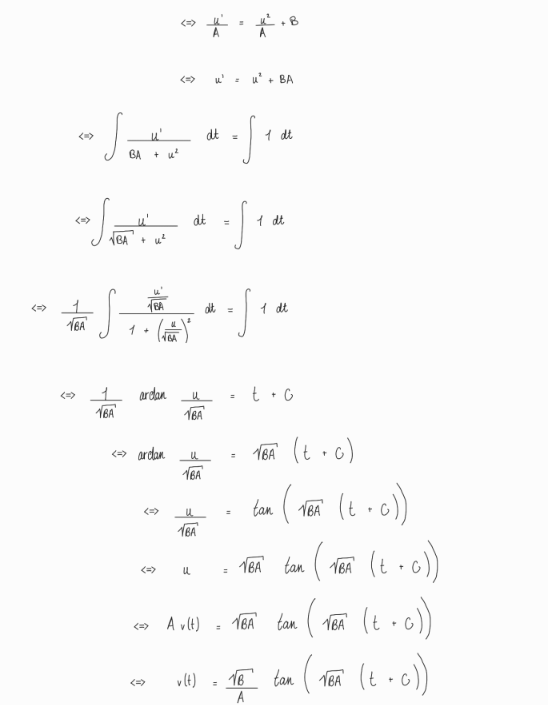
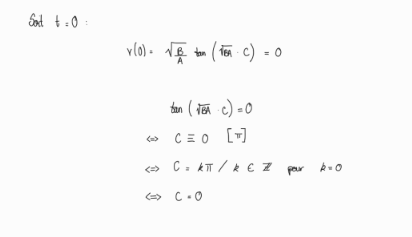

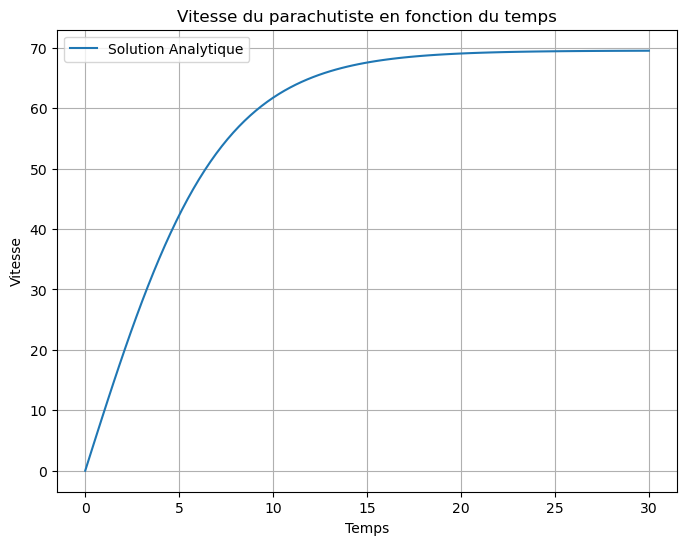

In [39]:
#Définir la solution analytique

# Constantes données
A = -2.03e-3
B = 9.81

def v_analytique(t):
    return -(B / A) ** (1/2) * np.tan((A * B) ** (1/2)*t)
    
# Générer des valeurs de temps pour le tracé
valeurs_temps = np.linspace(0, 30, 100)  # Ajustez la plage de temps selon vos besoins

# Calcul des valeurs de vitesse correspondantes en utilisant la solution analytique
valeurs_vitesse = v_analytique(valeurs_temps)

# Tracé de la vitesse en fonction du temps
plt.figure(figsize=(8, 6))
plt.plot(valeurs_temps, valeurs_vitesse, label='Solution Analytique')
plt.xlabel('Temps')
plt.ylabel('Vitesse')
plt.title('Vitesse du parachutiste en fonction du temps')
plt.legend()
plt.grid(True)
plt.show()

La solution analytique décrit précisément la vitesse du parachutiste en chute libre dans le temps sans nécessiter de calculs numériques. Elle permet de prédire la vitesse à tout moment, intégrant l'effet des frottements quadratiques. La "pointe" dans la courbe mathématique représente une singularité théorique où la vitesse devient infinie. Cependant, dans la réalité, de telles pointes ne se produisent pas, car les modèles idéalisés peuvent présenter des comportements non physiques ou asymptotiques.


Maintenant, passons aux méthodes numériques telles que la méthode d'Euler et les méthodes de Runge-Kutta qui sont utilisées lorsque des solutions analytiques ne sont pas facilement disponibles ou sont trop complexes. Ces méthodes fournissent des solutions approximatives en discrétisant le domaine temporel et en mettant à jour de manière itérative la solution.

In [31]:
#Résolution Numérique
#Définir le second membre de l'équation differentielle
def f_fluide(t, y):
    return A * (y**2) + B

Nous allons utiliser l'expression du Runge-Kutta d'ordre 2:
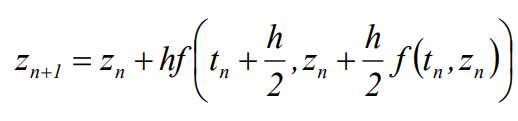

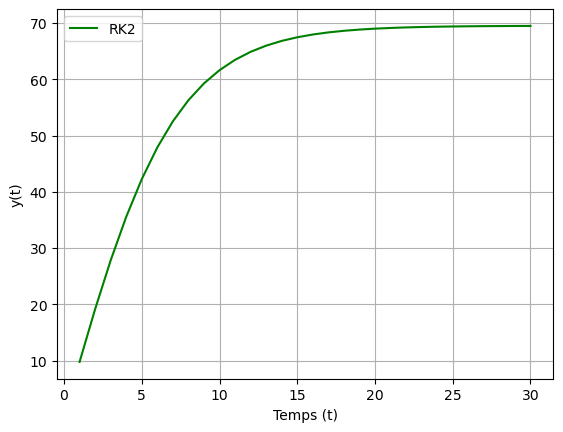

In [32]:
#Définir la fonction Runge-Kutta d'ordre 2
def runge_kutta_2(f, ti, tf, h, zi):
    x = ti
    y = zi
    LX = []
    LY = []
    while x < tf:
        x += h
        y = h * f(x + 0.5 * h, y + 0.5 * h * f(x,y)) + y
        LX.append(x)
        LY.append(y)
    return (LX, LY)

#Tracer notre estimation de la solution 
t2, rk2=runge_kutta_2(f_fluide,0, 30, 1, 0)

plt.plot(t2, rk2, label="RK2", c="green")
plt.xlabel("Temps (t)")
plt.ylabel("y(t)")
plt.legend()
plt.grid()
plt.show()


Nous allons utiliser l'expression du Runge-Kutta d'ordre 4:
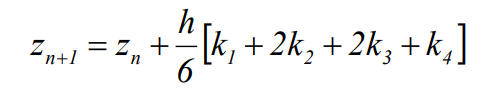
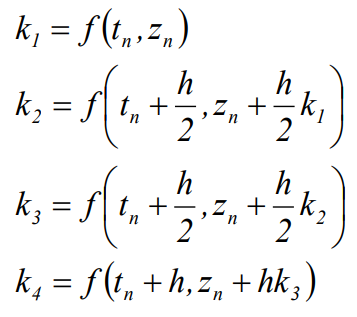


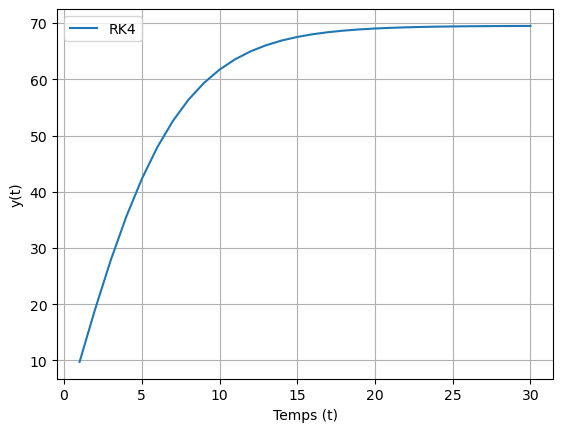

In [33]:
#Définir la fonction Runge-Kutta d'ordre 4
def runge_kutta_4(f, ti, tf, h, zi):
    a = []
    b = []
    for i in range (ti, tf):
        k1 = h * f(ti, zi)
        k2 = h * f(ti + 0.5 * h, zi + 0.5 * k1)
        k3 = h * f(ti + 0.5 * h, zi + 0.5 * k2)
        k4 = h * f(ti + h, zi + k3)
        
        zi = zi + (k1 + 2 * k2 + 2 * k3 + k4) / 6.0
        ti = ti + h
        
        a.append(ti)
        b.append(zi)
    
    return a, b
        
#Tracer notre estimation de la solution 
t4, rk4 = runge_kutta_4(f_fluide,0, 30, 1, 0)

plt.plot(t4, rk4, label="RK4")
plt.xlabel("Temps (t)")
plt.ylabel("y(t)")
plt.legend()
plt.grid()
plt.show()

In [34]:
#Euler Explicite
def euler_explicite(f, ti, tf, h, zi):
    x = ti
    y = zi
    LX=[]
    LY=[]
    while x < tf:
        x += h
        y = h * f(x, y) + y
        LX.append(x)
        LY.append(y)
    return LX, LY

In [35]:
#Euler Implicite
def euler_implicite(f, ti, tf, h, zi):
    x = ti
    y = zi
    LX=[]
    LY=[]
    while x < tf:
        x += h
        y = h * f(x + h, h * f(x, y) + y) + y
        LX.append(x)
        LY.append(y)
    return LX, LY

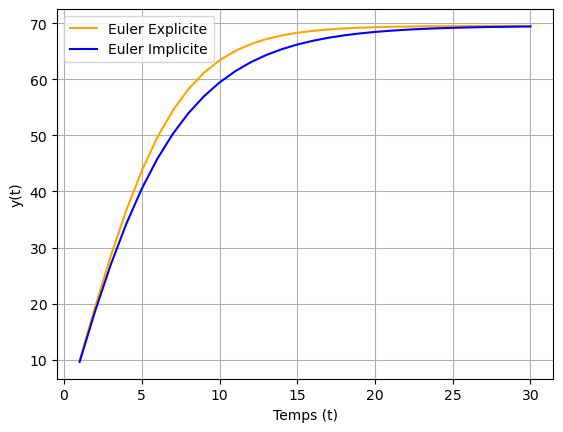

In [36]:
#Tracé de 2 courbes obtenus, à l'aide des méthodes d'Euler explicite, implicite à partir des conditions initiales (tf = 30 et h= 1)
t1, eul_exp=euler_explicite(f_fluide,0, 30, 1, 0)
t2, eul_imp=euler_implicite(f_fluide,0, 30, 1, 0)

plt.plot(t1, eul_exp, label="Euler Explicite", c="orange")
plt.plot(t2, eul_imp, label="Euler Implicite", c="blue")
plt.xlabel("Temps (t)")
plt.ylabel("y(t)")
plt.legend()
plt.grid()
plt.show()

Nous allons maintenant pouvoir voir les tracés des solutions obtenues à l'aide des 4 méthodes d'approximation de notre solution pour pouvoir les comparer.

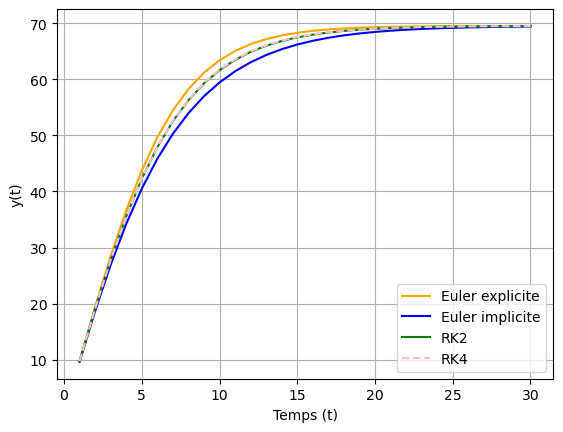

In [37]:
plt.plot(t1, eul_exp, label="Euler explicite", c="orange")
plt.plot(t2, eul_imp, label="Euler implicite", c="blue")
plt.plot(t2, rk2, label="RK2", c="green")
plt.plot(t4, rk4, linestyle='--', label="RK4", c = "pink")

plt.xlabel("Temps (t)")
plt.ylabel("y(t)")
plt.legend()
plt.grid()
plt.show()

Nous constatons que les differentes approximations semblent cohérentes entre elles.

<u>Comparaison des solutions:</u>
<br>En conclusion, l'analyse comparative des différentes méthodes numériques pour résoudre l'équation différentielle ordinaire  donnée nous permet les principales observations suivantes:

<strong>1. Runge-Kutta vs. Euler Explicite :</strong>

- La méthode de Runge-Kutta (RK2 et RK4) démontre une précision supérieure par rapport à la méthode d'Euler explicite.
- RK4, en tant que méthode d'ordre 4, surpasse RK2 et fournit des trajectoires plus lisses.
- La courbe verte (RK2) montre une convergence plus étroite avec le comportement attendu, soulignant l'importance des méthodes d'ordre supérieur.


<strong>2. Runge-Kutta vs. Euler Implicite :</strong>

- Les méthodes de Runge-Kutta présentent également une meilleure précision par rapport à la méthode d'Euler implicite.
- La courbe bleue (Euler implicite) montre une déviation vers le bas par rapport au comportement attendu, indiquant une sous-estimation de la solution.


<strong>3. Runge-Kutta vs. Solution Analytique :</strong>

- La comparaison avec la solution analytique met en évidence la capacité des méthodes numériques à reproduire le comportement réel du système.
- Les courbes de Runge-Kutta (notamment RK4) se rapprochent de la solution analytique, validant l'efficacité de ces méthodes pour simuler le système.


<strong>4. Méthodes de Runge-Kutta (RK2 et RK4) :</strong>

- Les méthodes de Runge-Kutta démontrent une précision supérieure par rapport aux méthodes d'Euler.
- RK4, en tant que méthode d'ordre 4, surpasse RK2 et offre des trajectoires plus régulières.
- La courbe pointillée rose (RK4) converge plus étroitement vers le comportement attendu, soulignant l'importance des méthodes d'ordre supérieur.


<strong>5. Euler Explicite vs. Euler Implicite :</strong>

- Euler Explicite a tendance à surestimer la solution, se manifestant par une déviation vers le haut par rapport au comportement attendu.
- Euler Implicite, en revanche, a tendance à sous-estimer la solution, entraînant une déviation vers le bas.
- Ces déviations mettent en évidence les différences inhérentes dans la nature anticipatrice (explicite) et rétrospective (implicite) des méthodes.


En résumé, le choix entre ces méthodes dépend du compromis entre l'efficacité computationnelle et la précision recherchée. 